# Unit 3 - Lesson 3 - Challenge - Optimize the model(s)

While the two packages yield similar accuracy rates, they have very different patterns of error. Play with the models by adding additional features and shrinking the regularization coefficient to see if you can get the accuracy higher than 68%.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
%matplotlib inline

### Fitting a binary logistic model using statsmodels

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


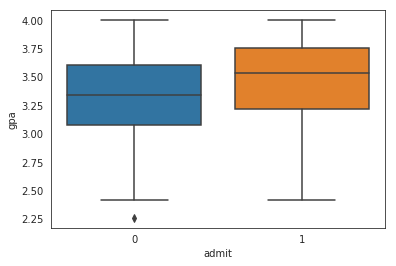

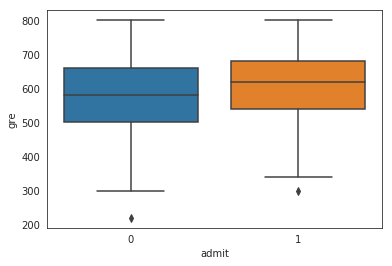

/home/dj/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


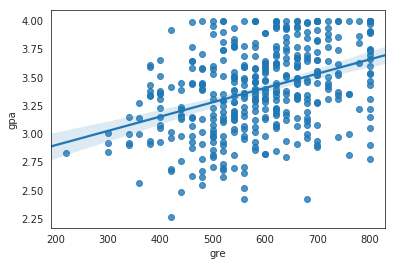

In [2]:
# Read in the data.
df = pd.read_csv("https://www.dropbox.com/s/qhf0ocdqb3gh7ni/logistic_regression.csv?dl=1") 

# Take a peek.
print(df.head())

# Prettier plots are better.
sns.set_style("white")

# Bivariate relationships of predictors to admissions outcome.
sns.boxplot(x="admit", y="gpa", data=df)
plt.show()
sns.boxplot(x="admit", y="gre", data=df)
plt.show()

# Relationship between predictors.
sns.regplot(x='gre', y='gpa', data=df)
plt.show()

In [3]:
df['gre*gpa'] = df['gre'] * df['gpa']
df['gre*rank'] = df['gre'] * df['rank']
df['gpa*rank'] = df['gpa'] * df['rank']

In [4]:
df.head()

,admit,gre,gpa,rank,gre*gpa,gre*rank,gpa*rank
0,0,380,3.61,3,1371.8,1140,10.83
1,1,660,3.67,3,2422.2,1980,11.01
2,1,800,4.00,1,3200.0,800,4.00
3,1,640,3.19,4,2041.6,2560,12.76
4,0,520,2.93,4,1523.6,2080,11.72


In [5]:
# Declare predictors.
X_statsmod = df[['gre', 'gpa', 'rank', 'gre*gpa']]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(df['admit'], X_statsmod)
result = logit.fit()

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.570747
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            4
Date:                Sun, 30 Dec 2018   Pseudo R-squ.:                 0.08676
Time:                        00:24:22   Log-Likelihood:                -228.30
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 8.634e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0185      0.010      1.872      0.061      -0.001       0.038
gpa            3.6610      1.

/home/dj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = result.predict(X_statsmod)

# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
table = pd.crosstab(df['admit'], pred_y_statsmod)

print('\n Accuracy by admission status')
print(table)
print('\n Percentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))


 Accuracy by admission status
col_0    0   1
admit         
0      256  17
1       98  29

 Percentage accuracy
0.7125


### Fitting a binary logistic model using SKLearn

In [7]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C=1e3)
y = df['admit']
X = df[['gpa', 'gre', 'rank', 'gre*gpa']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[-0.20000686 -0.00266938 -0.56807794  0.00143395]]
[-0.06792509]

 Accuracy by admission status
admit    0   1
row_0         
0      254  99
1       19  28

 Percentage accuracy
0.705


/home/dj/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
